In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, cross_validation, svm

In [4]:
# 使用鸢尾花数据
def load_data():
    iris = datasets.load_iris()
    x_train = iris.data
    y_train = iris.target
    return cross_validation.train_test_split(x_train, y_train, test_size = 0.25, random_state = 0, stratify = y_train)

In [5]:
# 非线性分类器SVC-线性核
def test_SVC_linear(*data):
    x_train, x_test, y_train, y_test = data
    svc = svm.SVC(kernel='linear')
    svc.fit(x_train,y_train)
    print('Coefficients:{0}, intercept {1}'.format(svc.coef_, svc.intercept_))
    print('Score: {0}'.format(svc.score(x_test, y_test)))

x_train, x_test, y_train, y_test = load_data()
test_SVC_linear(x_train, x_test, y_train, y_test )

Coefficients:[[-0.16990304  0.47442881 -0.93075307 -0.51249447]
 [ 0.02439178  0.21890135 -0.52833486 -0.25913786]
 [ 0.52289771  0.95783924 -1.82516872 -2.00292778]], intercept [2.0368826 1.1512924 6.3276538]
Score: 1.0


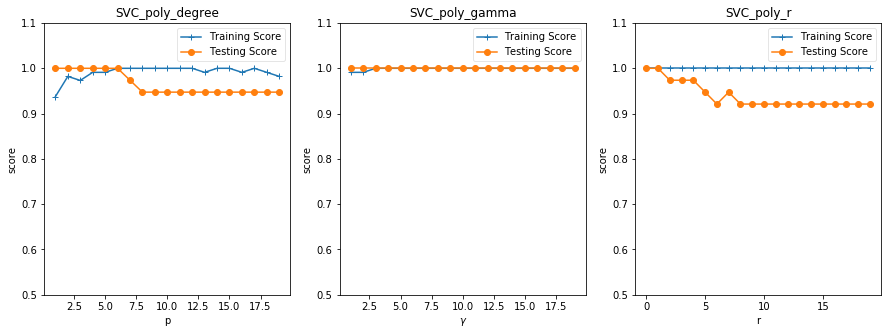

In [12]:
# 非线性分类器SVC-多项式核
def test_SVC_poly(*data):
    train_x, test_x, train_y, test_y = data
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    # 测试degree
    degrees = range(1,20)
    train_score = []
    test_score = []
    for degree in degrees:
        svc = svm.SVC(kernel='poly',degree=degree)
        svc.fit(train_x,train_y)
        train_score.append(svc.score(train_x,train_y))
        test_score.append(svc.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(131)
    ax.plot(degrees,train_score,label='Training Score',marker='+')
    ax.plot(degrees,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'p')
    ax.set_ylabel('score')
    ax.set_title('SVC_poly_degree')
    ax.set_ylim(0.5,1.1)
    ax.legend(loc='best',framealpha=0.5)
    
    # 测试gamma
    gammas = range(1,20)
    train_score = []
    test_score = []
    for gamma in gammas:
        svc = svm.SVC(kernel='poly',gamma=gamma,degree=3)
        svc.fit(train_x,train_y)
        train_score.append(svc.score(train_x,train_y))
        test_score.append(svc.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(132)
    ax.plot(gammas,train_score,label='Training Score',marker='+')
    ax.plot(gammas,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel('score')
    ax.set_title('SVC_poly_gamma')
    ax.set_ylim(0.5,1.1)
    ax.legend(loc='best',framealpha=0.5)
    
    # 测试r
    rs = range(0,20)
    train_score = []
    test_score = []
    for r in rs:
        svc = svm.SVC(kernel='poly',gamma=10,degree=3, coef0=r)
        svc.fit(train_x,train_y)
        train_score.append(svc.score(train_x,train_y))
        test_score.append(svc.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(133)
    ax.plot(rs,train_score,label='Training Score',marker='+')
    ax.plot(rs,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'r')
    ax.set_ylabel('score')
    ax.set_title('SVC_poly_r')
    ax.set_ylim(0.5,1.1)
    ax.legend(loc='best',framealpha=0.5)
    
    plt.show()

x_train, x_test, y_train, y_test = load_data()
test_SVC_poly(x_train, x_test, y_train, y_test )

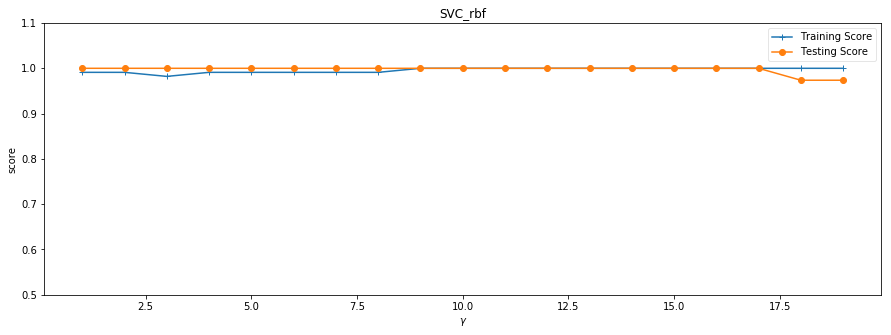

In [13]:
# 非线性分类器SVC-高斯核
def test_SVC_rbf(*data):
    train_x, test_x, train_y, test_y = data
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    # 测试gamma
    gammas = range(1,20)
    train_score = []
    test_score = []
    for gamma in gammas:
        svc = svm.SVC(kernel='rbf',gamma=gamma)
        svc.fit(train_x,train_y)
        train_score.append(svc.score(train_x,train_y))
        test_score.append(svc.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(111)
    ax.plot(gammas,train_score,label='Training Score',marker='+')
    ax.plot(gammas,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel('score')
    ax.set_title('SVC_rbf')
    ax.set_ylim(0.5,1.1)
    ax.legend(loc='best',framealpha=0.5)
    
    
    plt.show()

x_train, x_test, y_train, y_test = load_data()
test_SVC_rbf(x_train, x_test, y_train, y_test )

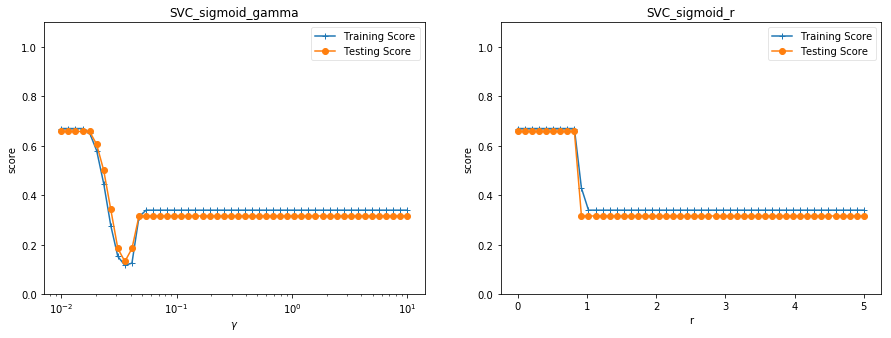

In [15]:
# 非线性分类器SVC-sigmoid核
def test_SVC_sigmoid(*data):
    train_x, test_x, train_y, test_y = data
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
    # 测试gamma
    gammas = np.logspace(-2, 1)
    train_score = []
    test_score = []
    for gamma in gammas:
        svc = svm.SVC(kernel='sigmoid',gamma=gamma,coef0=0)
        svc.fit(train_x,train_y)
        train_score.append(svc.score(train_x,train_y))
        test_score.append(svc.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(121)
    ax.plot(gammas,train_score,label='Training Score',marker='+')
    ax.plot(gammas,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel('score')
    ax.set_title('SVC_sigmoid_gamma')
    ax.set_xscale('log')
    ax.set_ylim(0.0,1.1)
    ax.legend(loc='best',framealpha=0.5)
    
    # 测试r
    rs = np.linspace(0,5)
    train_score = []
    test_score = []
    for r in rs:
        svc = svm.SVC(kernel='sigmoid',gamma=0.01,coef0=r)
        svc.fit(train_x,train_y)
        train_score.append(svc.score(train_x,train_y))
        test_score.append(svc.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(122)
    ax.plot(rs,train_score,label='Training Score',marker='+')
    ax.plot(rs,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'r')
    ax.set_ylabel('score')
    ax.set_title('SVC_sigmoid_r')
    ax.set_ylim(0.0,1.1)
    ax.legend(loc='best',framealpha=0.5)
    
    plt.show()

x_train, x_test, y_train, y_test = load_data()
test_SVC_sigmoid(x_train, x_test, y_train, y_test )